In [206]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import textwrap
%matplotlib inline

In [220]:
def load_data(filename):
    answers = dict()

    with open(filename) as input:
        reader = csv.reader(input, delimiter=',', quotechar='"')
        for i, row in enumerate(reader):
            if i == 0:
                questions = row
                for j, question in enumerate(row):
                    answers[j] = []
            else:
                for j, entry in enumerate(row):
                    try:
                        answers[j].append(int(entry))
                    except:
                        answers[j].append(entry)
                        
    return questions, answers

In [230]:
def plot_histogram(indices, questions, answers, format='png'):
    for index in indices:
        range = np.arange(1, 12, 1)-0.5 if np.any(np.array(answers[index]) > 5) else np.arange(1, 7, 1)-0.5
        ticks = np.arange(1, 11, 1) if np.any(np.array(answers[index]) > 5) else np.arange(1, 6, 1)
        
        plt.figure(figsize=(12, 6))
        title = plt.title(questions[index], loc='center', wrap=True)
        title._get_wrap_line_width = lambda : 670.
        plt.hist(answers[index], bins=range, edgecolor='white', density=False)
        plt.xlim(range[0], range[-1])
        plt.locator_params(axis='y', integer=True)
        plt.xticks(ticks)
        if format == 'png':
            plt.savefig(f'fig{index:02d}.png', facecolor='white')
        elif format == 'pdf':
            plt.savefig(f'fig{index:02d}.pdf')

In [216]:
def plot_pie_chart(indices, questions, answers, format='png'):
    for index in indices:
        unique_answers = set(answers[index])
        frequencies = dict(zip(unique_answers, np.zeros(shape=len(unique_answers), dtype=int)))
        for answer in answers[index]:
            frequencies[answer] += 1
        
        title = questions[index]
        plt.figure(figsize=(12,6))
        plt.title(title)
        plt.pie(frequencies.values(), labels=frequencies.keys(), autopct='%d%%', startangle=90, pctdistance=0.5, wedgeprops={'alpha': 0.5})
        if format == 'png':
            plt.savefig(f'fig{index:02d}.png', facecolor='white')
        elif format == 'pdf':
            plt.savefig(f'fig{index:02d}.pdf')

In [217]:
def plot_commentary(indices, questions, answers, format='png'):
    for index in indices:
        title = questions[index]

        plt.figure(figsize=(12,6))
        plt.title(title)
        plt.gca().axis('off')
        delta = 0.23
        counter = 0.0
        for answer in answers[index]:
            if answer == '':
                continue
            buffer = textwrap.wrap(answer, width=130)
            for line in buffer:
                text = plt.text(-0.12, 0.92-counter*delta, line, fontsize=12)
                counter += delta
        if format == 'png':
            plt.savefig(f'fig{index:02d}.png', facecolor='white')
        elif format == 'pdf':
            plt.savefig(f'fig{index:02d}.pdf')        

/tmp/ipykernel_903044/3490550636.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,6))


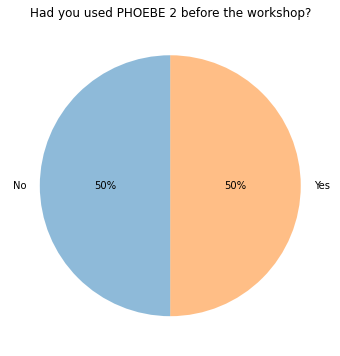

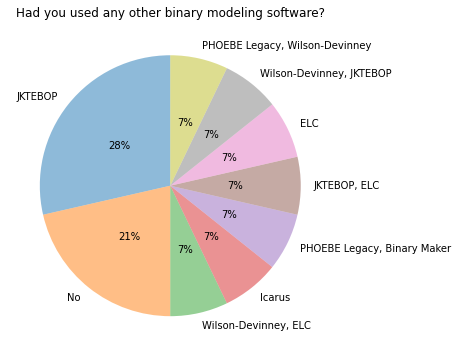

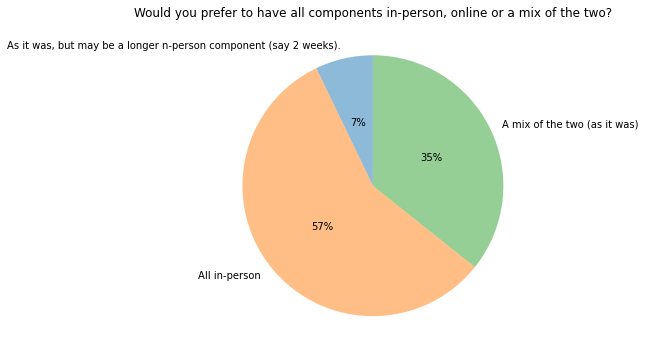

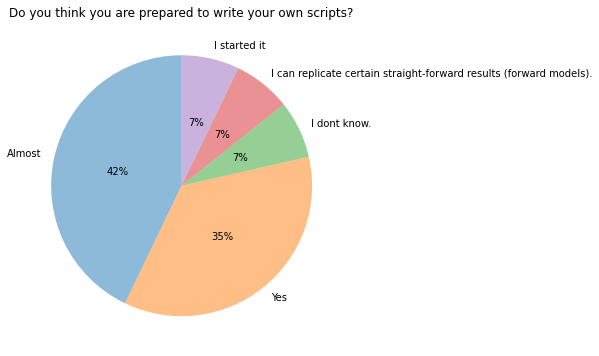

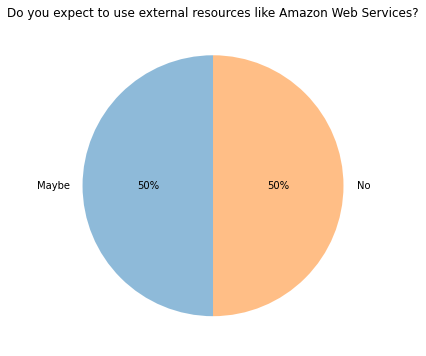

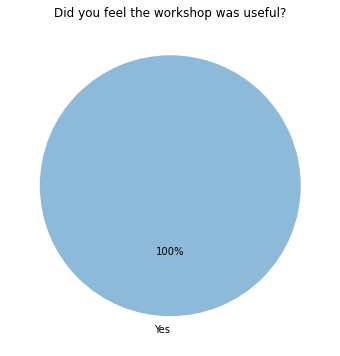

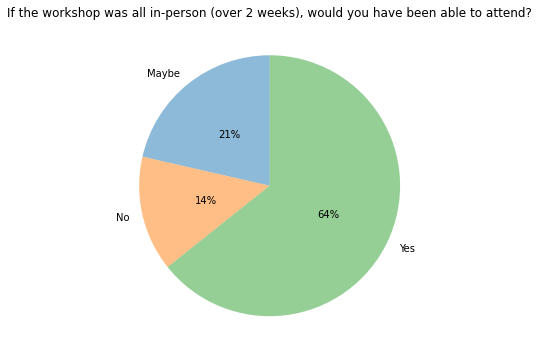

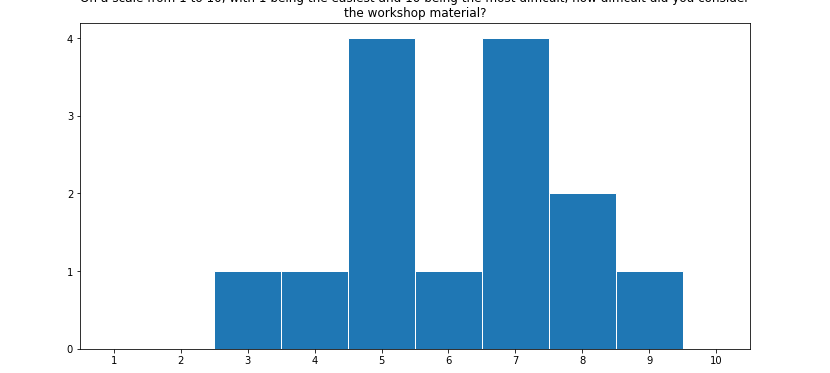

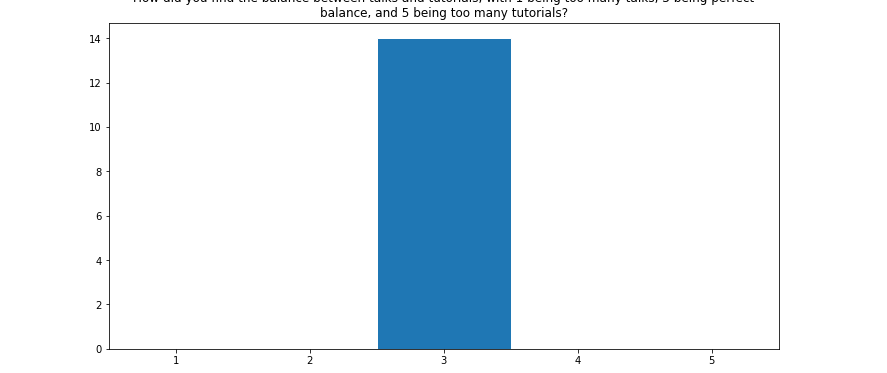

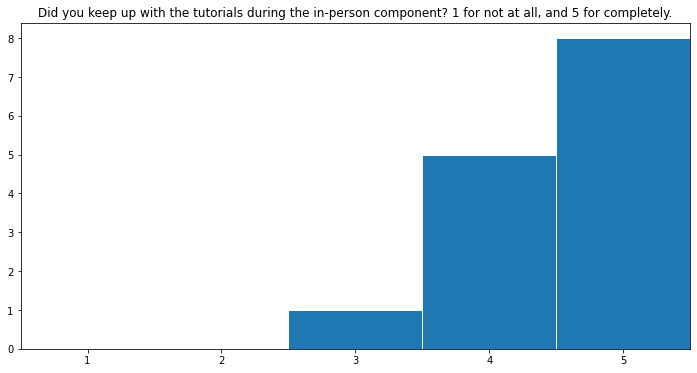

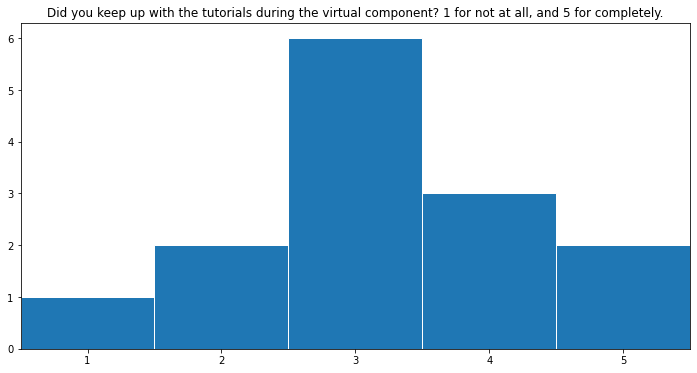

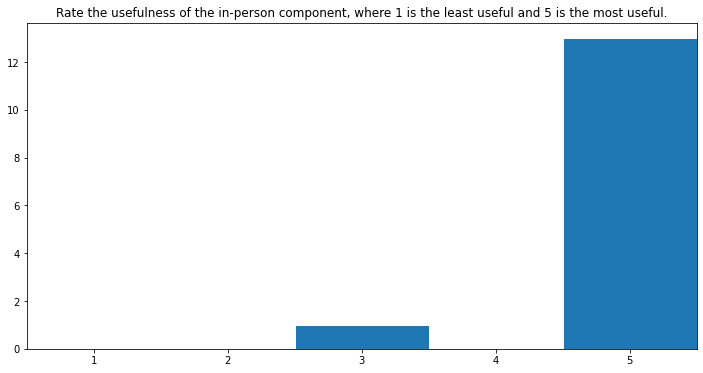

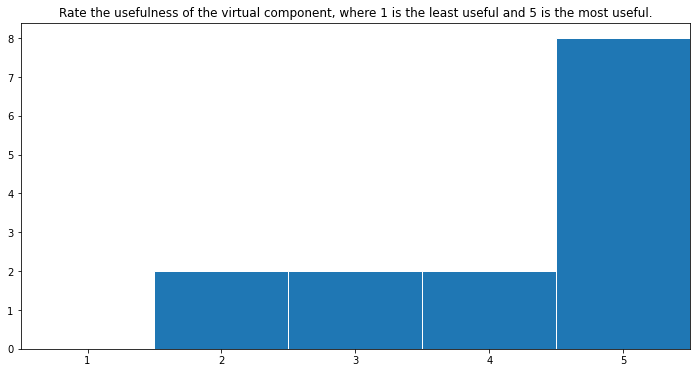

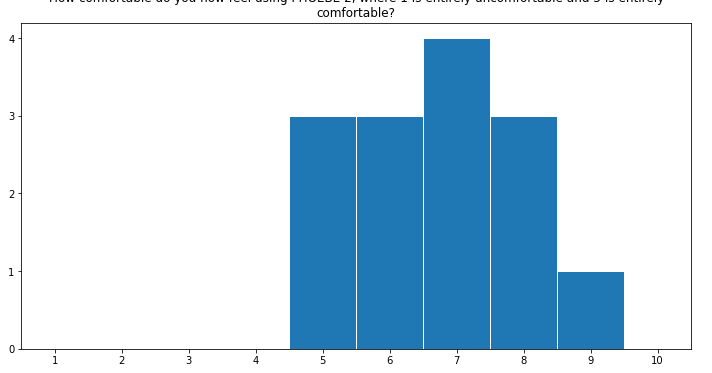

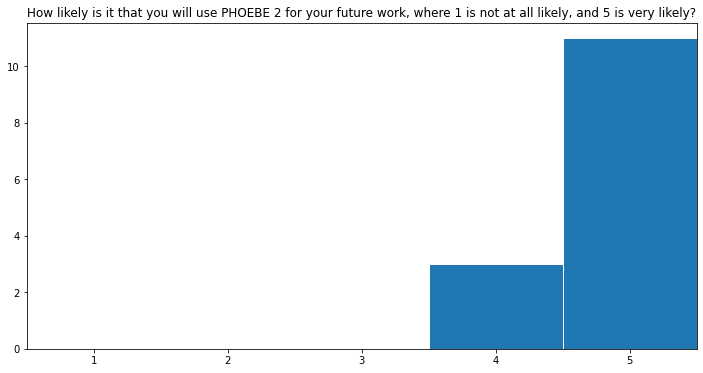

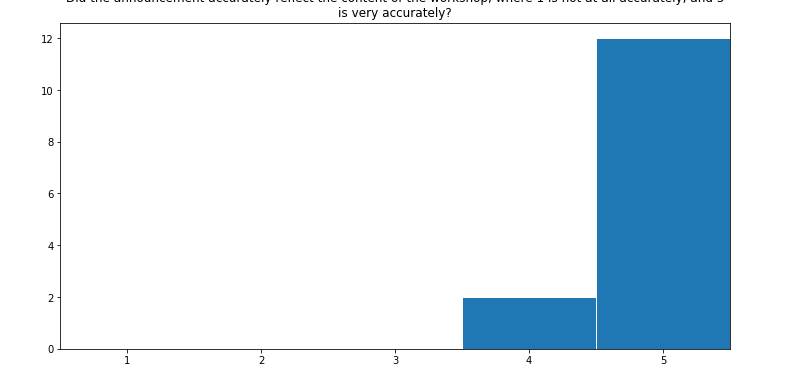

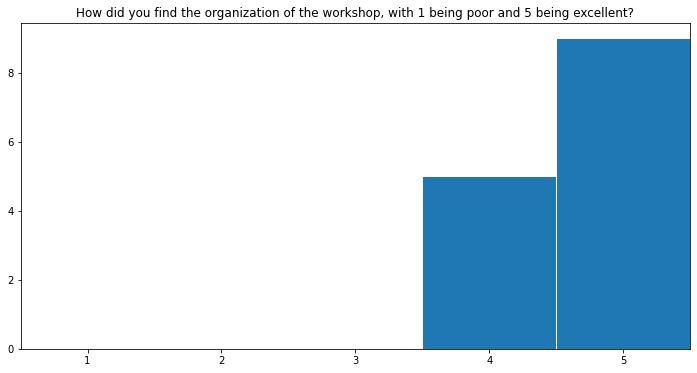

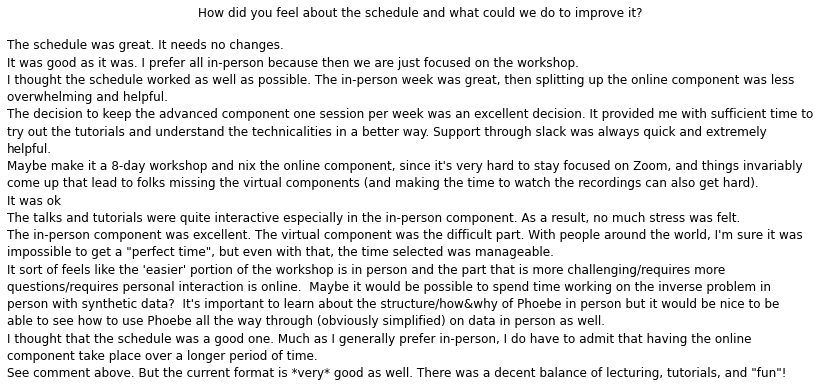

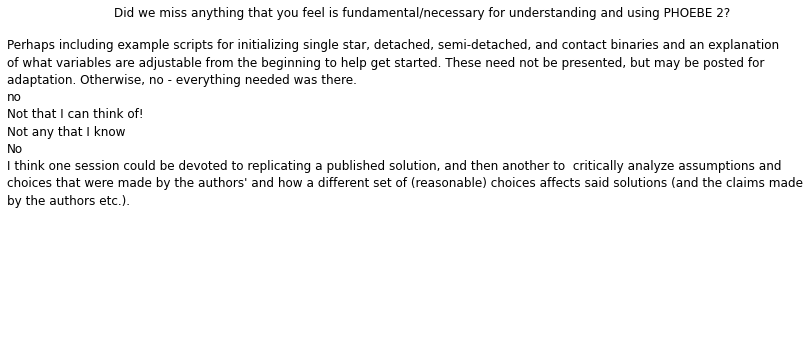

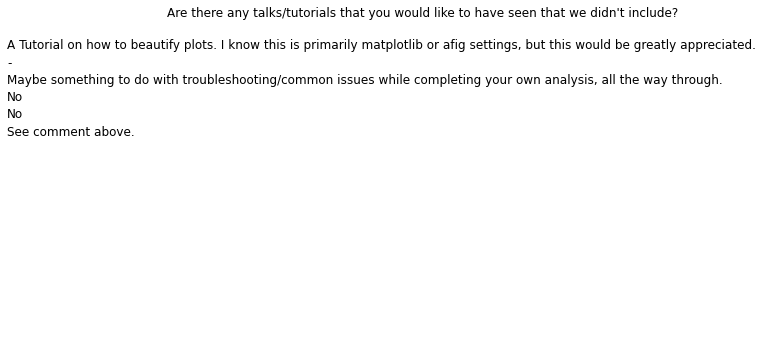

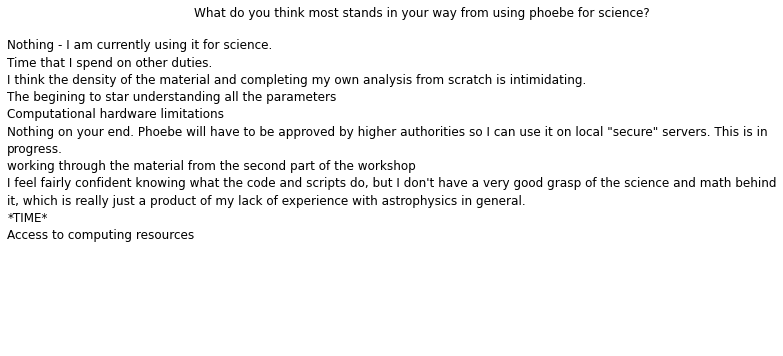

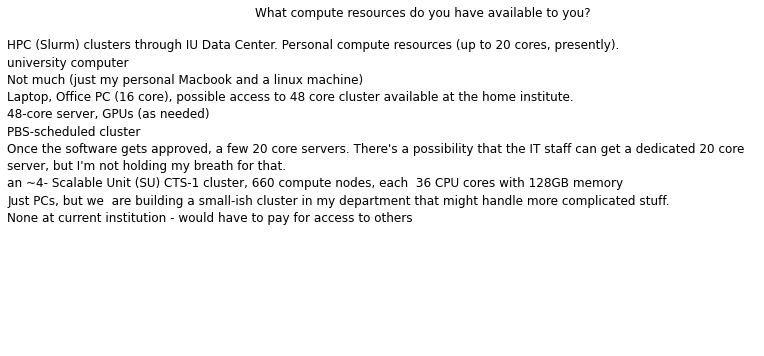

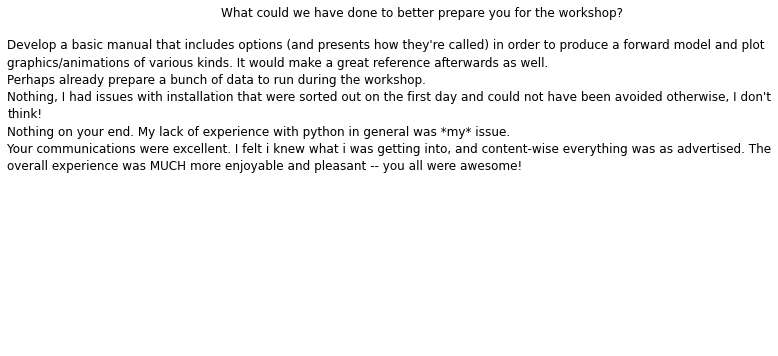

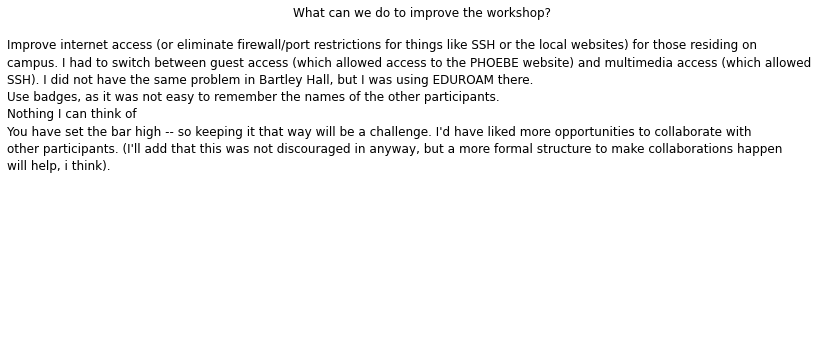

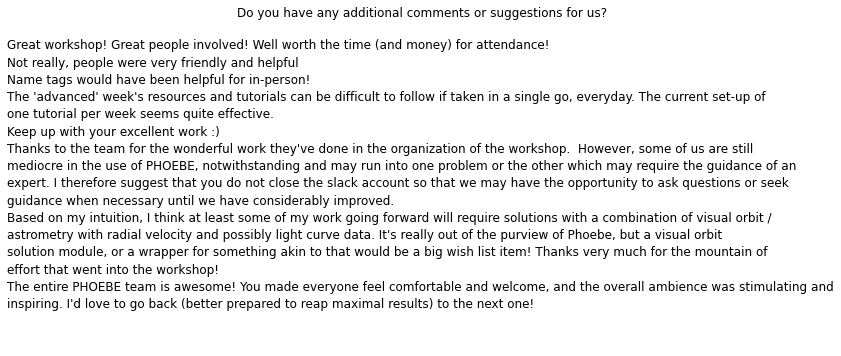

In [232]:
questions, answers = load_data('workshop4.csv')
plot_pie_chart([1, 2, 9, 14, 18, 21, 23], questions, answers, format='pdf')
plot_histogram([3, 4, 5, 6, 7, 8, 13, 16, 19, 24], questions, answers, format='pdf')
plot_commentary([10, 11, 12, 15, 17, 20, 22, 25], questions, answers, format='pdf')
!pdftk fig??.pdf cat output phoebe4_exit_questionnaire.pdf
!rm fig??.pdf

/tmp/ipykernel_903044/3490550636.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,6))


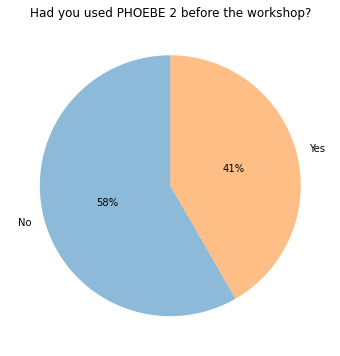

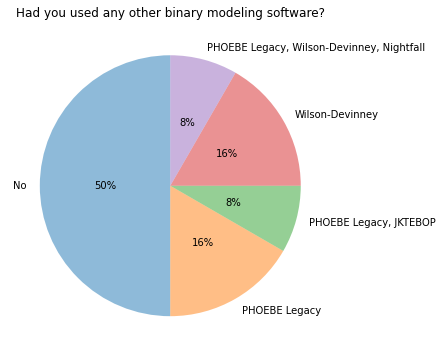

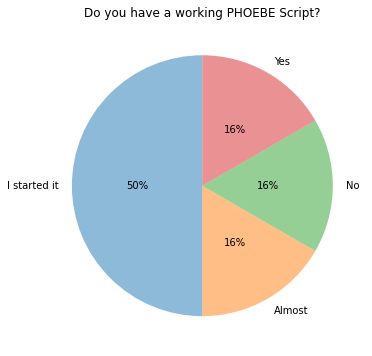

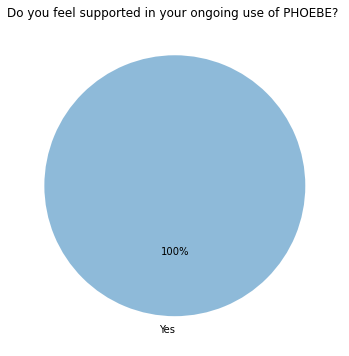

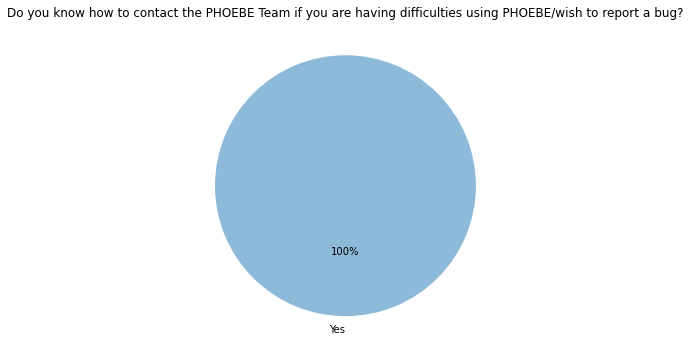

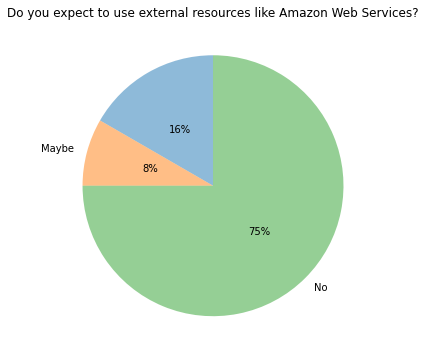

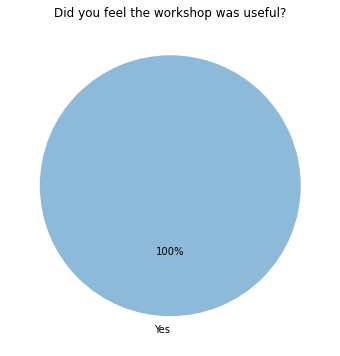

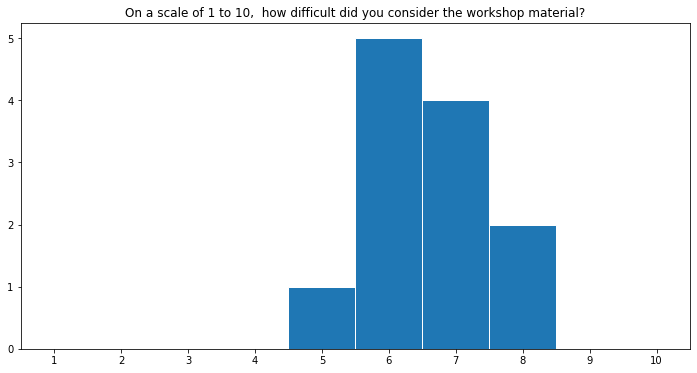

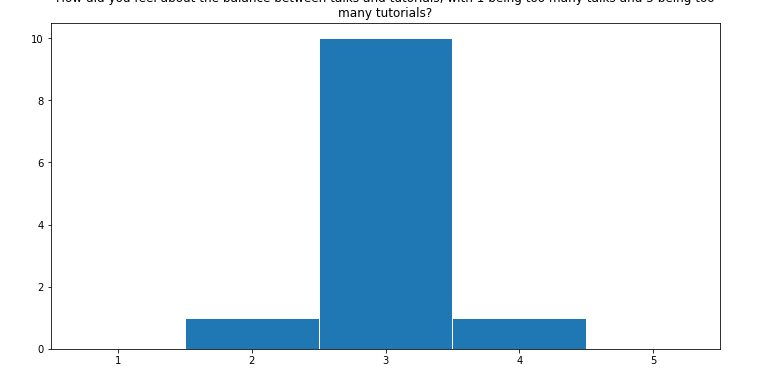

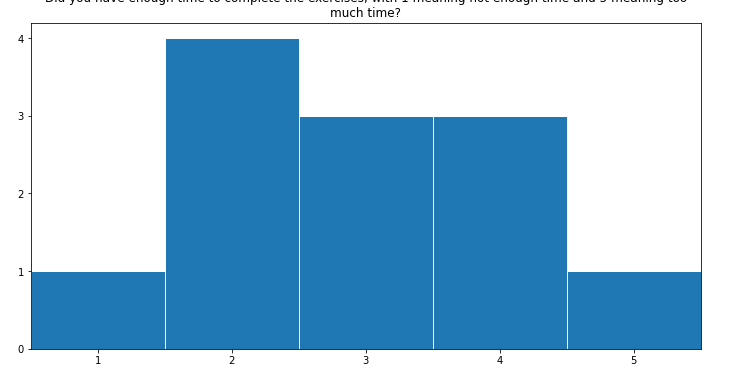

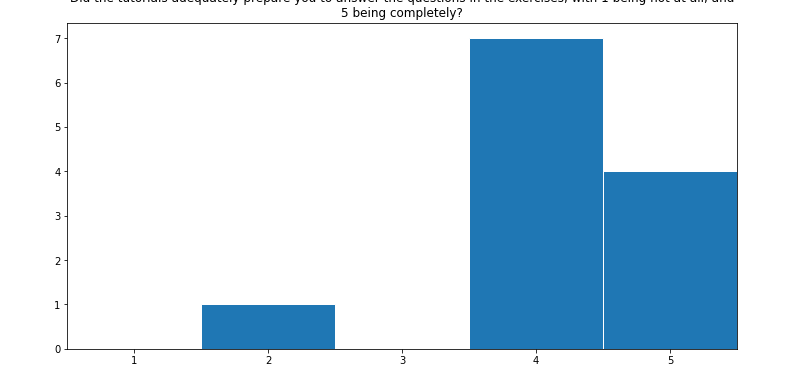

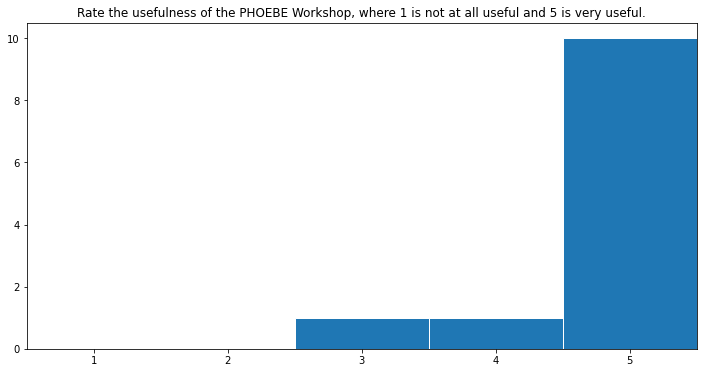

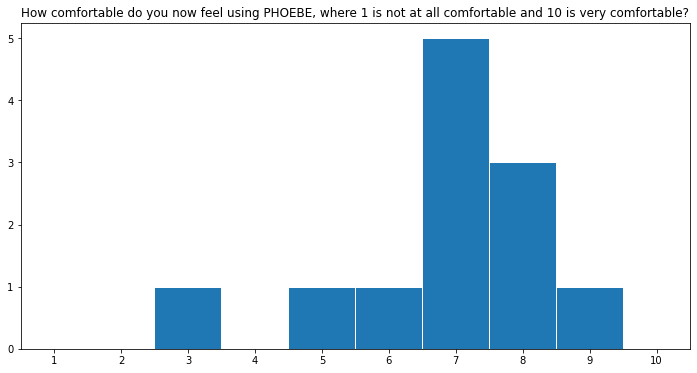

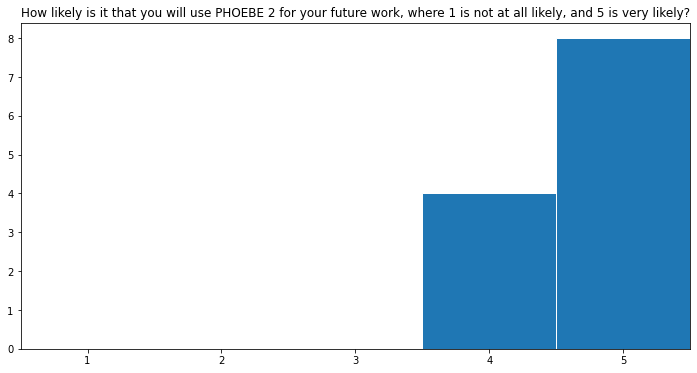

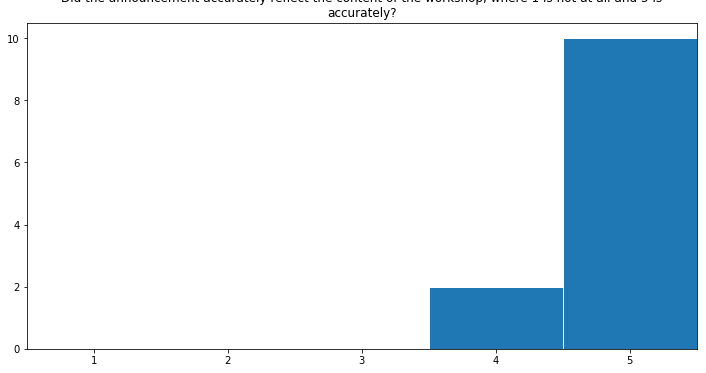

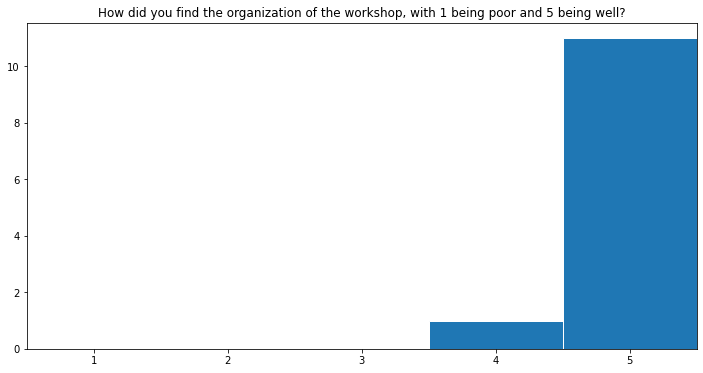

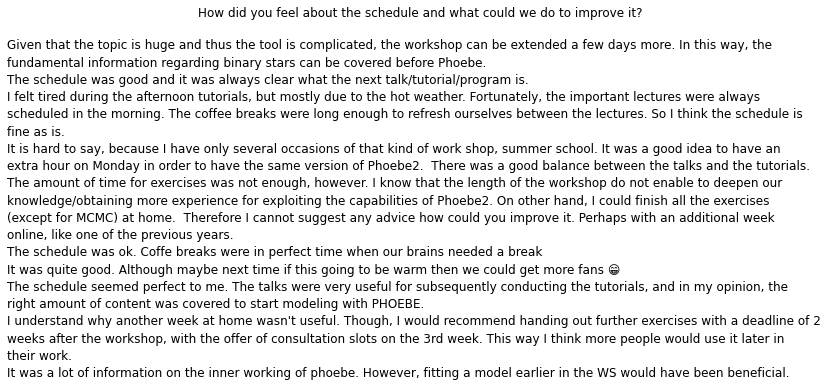

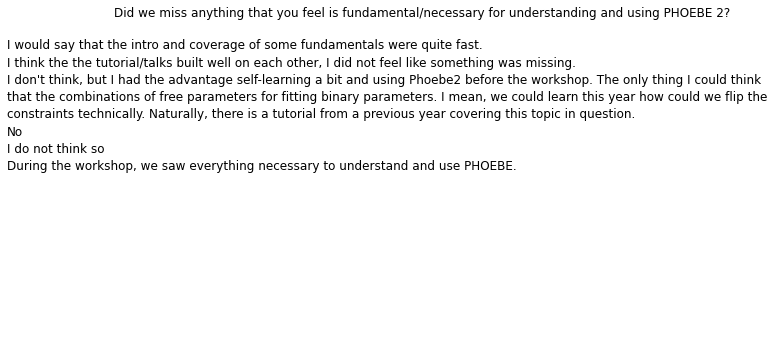

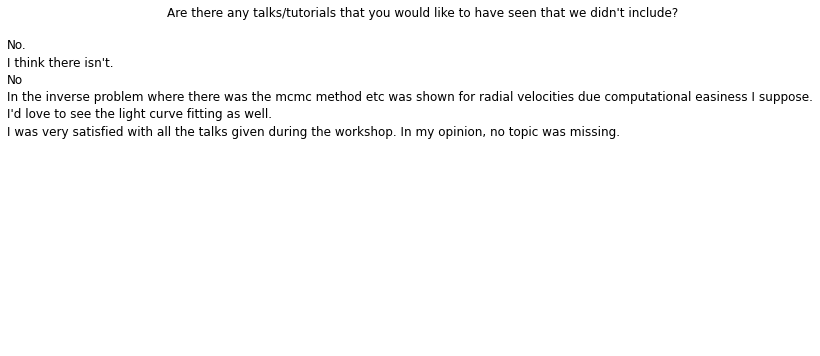

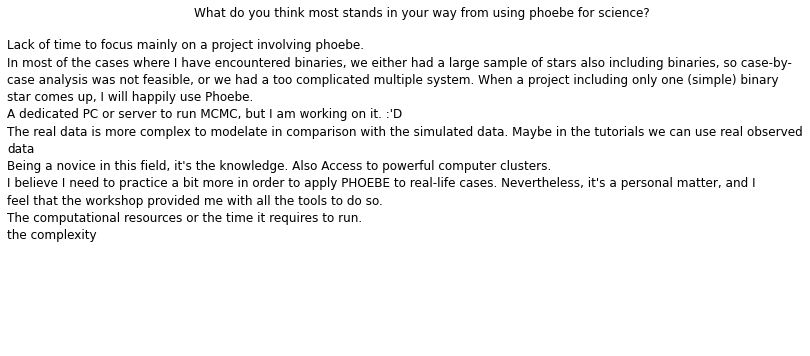

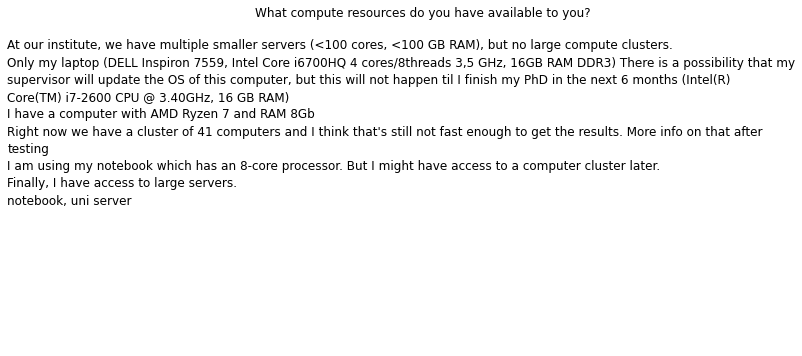

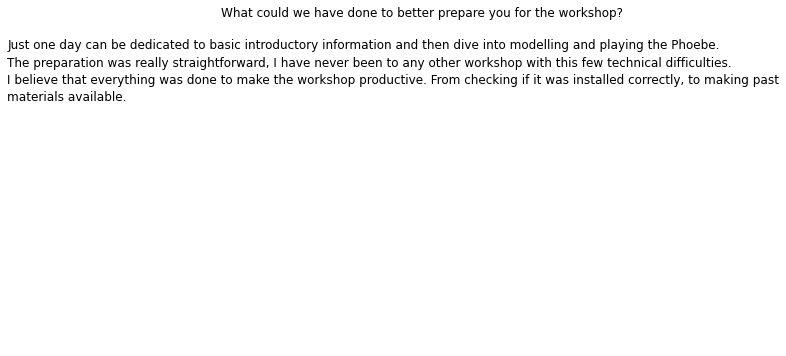

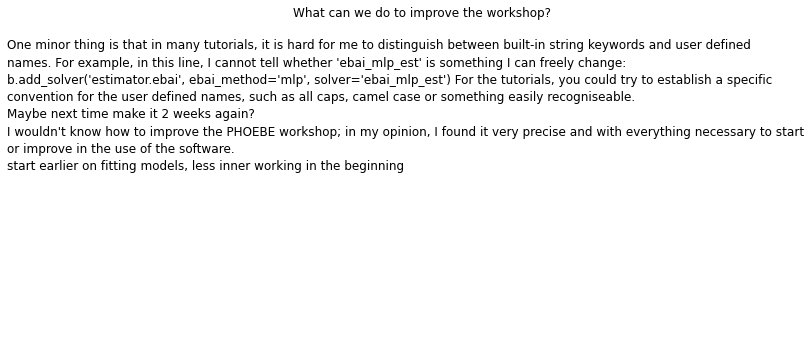

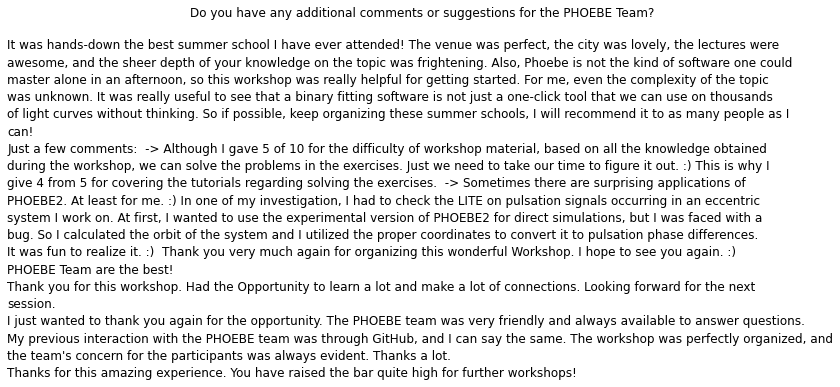

In [233]:
questions, answers = load_data('workshop5.csv')
plot_pie_chart([1, 2, 12, 14, 16, 18, 21], questions, answers, format='pdf')
plot_histogram([3, 4, 5, 6, 7, 11, 15, 19, 23], questions, answers, format='pdf')
plot_commentary([8, 9, 10, 13, 17, 20, 22, 24], questions, answers, format='pdf')
!pdftk fig??.pdf cat output phoebe5_exit_questionnaire.pdf
!rm fig??.pdf